In [56]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras import layers

import random
from shutil import copyfile
import os

In [57]:
def walk_through_dir(data_dir):
    for dirpaths, dirnames, filenames in os.walk(data_dir):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpaths}"')

In [58]:
def plot_random_image(target_dir):
    target_class = random.choice(os.listdir(target_dir))
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 5)
    
    plt.figure(figsize=(16, 5))
    
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        img = tf.io.read_file(os.path.join(target_folder, random_image[i]))
        img = tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'{target_class}\n{img.shape}')
        plt.axis(False)

In [59]:
def plot_original_and_augmented_image(train_dir, class_names, data_augmetation):
    target_class = random.choice(class_names)
    target_dir = os.path.join(train_dir, target_class)
    random_image = random.choice(os.listdir(target_dir))
    img = tf.io.read_file(os.path.join(target_dir, random_image))
    img = tf.io.decode_image(img)
    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis(False)
    
    plt.title(f'Original Image from class: {target_class}, shape: {img.shape}',fontsize=15)
        
    augmented_image = data_augmetation(img)
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image / 255)
    plt.axis(False)
    plt.title(f'Augmented Image from class: {target_class}, shape: {img.shape}',fontsize=15);
    

In [60]:
input_data_dir = 'C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\PetImages'
walk_through_dir(input_data_dir)

There are 2 directories and 0 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\PetImages"
There are 0 directories and 13500 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\PetImages\Cat"
There are 0 directories and 13500 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\PetImages\Dog"


In [61]:
# os.mkdir('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data')
# os.mkdir('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\train_data')
# os.mkdir('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\test_data')

In [62]:
# for folder in os.listdir(input_data_dir):
#     files_dir = os.listdir(os.path.join(input_data_dir, folder))
#     images = []
#     for file in files_dir:
#         try:
#             img = tf.io.read_file(os.path.join(input_data_dir, folder, file))
#             img = tf.io.decode_image(img)
#             if img.ndim == 3:
#                 images.append(file)
#         except:
#             pass
        
#     random.shuffle(images)
#     count = len(images)
#     split = int(count * 0.8)
#     os.mkdir(os.path.join('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\train_data',
#                           folder))
#     os.mkdir(os.path.join('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\test_data',
#                           folder))
        
#     for i in range(split):
#         sourse_path = os.path.join(input_data_dir, folder, images[i])
#         distination = os.path.join('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\train_data',
#                                    folder, images[i])
#         copyfile(sourse_path,distination)
          
#     for i in range(split, count):
#         sourse_path = os.path.join(input_data_dir, folder, images[i])
#         distination = os.path.join('C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\test_data',
#                                    folder, images[i])
#         copyfile(sourse_path,distination)

In [63]:
train_dir = 'C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\train_data'
walk_through_dir(train_dir)

There are 2 directories and 0 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\train_data"
There are 0 directories and 10780 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\train_data\Cat"
There are 0 directories and 10772 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\train_data\Dog"


In [64]:
test_dir = 'C:\\Users\\vikto\\Documents\\IT\\neural networks\\cats-vs-dogs\\data\\test_data'
walk_through_dir(test_dir)

There are 2 directories and 0 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\test_data"
There are 0 directories and 2695 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\test_data\Cat"
There are 0 directories and 2693 images in "C:\Users\vikto\Documents\IT\neural networks\cats-vs-dogs\data\test_data\Dog"


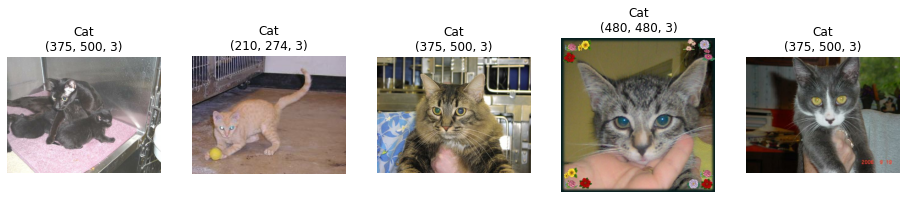

In [65]:
plot_random_image(train_dir)

In [66]:
IMAGE_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
label_mode='binary',
image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
label_mode='binary',
image_size=IMAGE_SIZE,
shuffle=False)

Found 21552 files belonging to 2 classes.
Found 5388 files belonging to 2 classes.


In [67]:
class_names=train_data.class_names
print(class_names)

['Cat', 'Dog']


In [68]:
train_data_pf = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)
test_data_pf = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

In [69]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
#     tf.keras.layers.Rescaling(scale=1.0/255)
], name='Data_augmentation_layer')

In [70]:
k.mixed_precision.set_global_policy('mixed_float16')

inputs = k.Input(shape=(224, 224, 3), name='Input_layer')
x = data_augmentation(inputs)

scale_layer = k.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

x = k.layers.Conv2D(32,(3, 3), activation='swish', input_shape=(224, 224, 3))(x)
x = k.layers.Conv2D(32,(1, 1), activation='swish', input_shape=(224, 224, 3))(x)
x = k.layers.MaxPooling2D((2, 2))(x)

x = k.layers.Conv2D(64,(2, 2), activation='swish')(x)
x = k.layers.Conv2D(64,(3, 3), activation='swish')(x)
x = k.layers.MaxPooling2D((2, 2))(x)

x = k.layers.Conv2D(32,(2, 2), activation='swish')(x)
x = k.layers.GlobalAveragePooling2D(name='Global_Average_Pool_2D')(x)
x = k.layers.Dropout(0.33)(x)


outputs = k.layers.Dense(1, activation='softmax', dtype='float32', name="Output_layer")(x)

model = k.Model(inputs, outputs, name='model')

In [71]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      1056      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                         

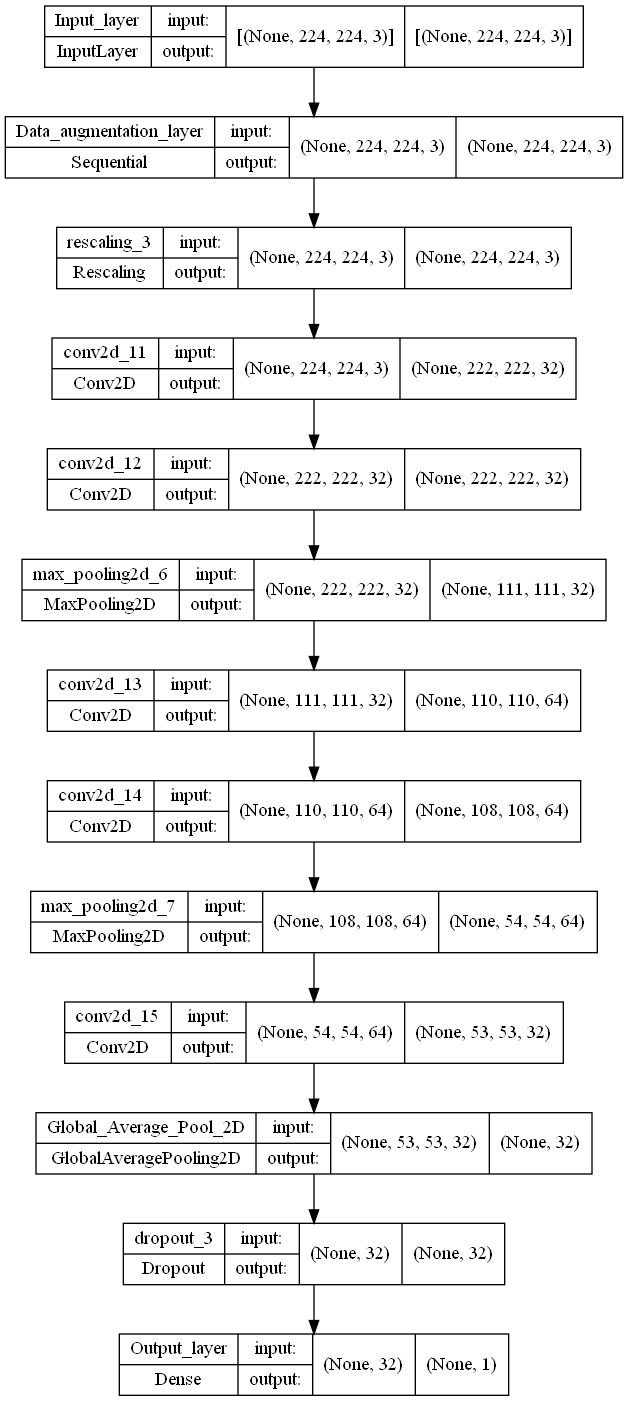

In [72]:
k.utils.plot_model(model, "Model_self.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=k.optimizers.Adam(),
    loss=k.losses.BinaryCrossentropy(from_logits=True),
    metrics=[k.metrics.BinaryAccuracy()],
)

epochs = 5
history = model.fit(train_data, epochs=epochs, validation_data=test_data)

Epoch 1/5


C:\Users\vikto\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 22/674 [..............................] - ETA: 17:18 - loss: 0.6946 - binary_accuracy: 0.4886

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_data)
print("test loss, test acc:", results)